# Dataset and domain
### Import all packages
### Load Data
### Pre-Processing Data Analysis(count of missing/ null values, redundant columns, etc.)) ]

<h3>Import all packages<h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.metrics import accuracy_score
from collections import Counter
from imblearn import under_sampling, over_sampling

<h3>Load data into pandas DataFrame<h3>

In [2]:
# Creating the dataframe
df = pd.read_csv('bank-full1.csv')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


<h3>Exploring the data (EDA)-(count of missing/ null values, redundant columns, etc.)<h3>

In [3]:
# There is no null values in the data
df.isnull().head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
# Removing the "Unknown" from the following
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [5]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [6]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [7]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

As the dataset contain unknown values, so we will remove all the rows containing the unknown values
          We will remove the "unknown" values from Job, Education and poutcome column


In [8]:
i = df[((df.job == 'unknown'))].index
df1 = df.drop(i)

In [9]:
# the unknown from the job column has now been removed
df1.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [10]:
# Similarly for the education column
i = df1[((df1.education == 'unknown'))].index
df2 = df1.drop(i)

In [11]:
df2.education.unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [12]:
# Now we will remove the unknow values from the poutcome column
# Similarly for the education column
i = df2[((df2.poutcome == 'unknown'))].index
df3 = df2.drop(i)

In [13]:
df3.poutcome.unique()

array(['failure', 'other', 'success'], dtype=object)

<h3>Finding the outliers and Removing them by using the IQR method<h3>


In [14]:
Q1 = df3.campaign.quantile(0.25)
Q3 = df3.campaign.quantile(0.75)
Q1, Q3

(1.0, 2.0)

In [15]:
IQR = Q3 - Q1
IQR

1.0

In [16]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-0.5, 3.5)

In [17]:
# here are the outliers
df3[(df3.campaign<lower_limit)|(df3.campaign>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24626,48,management,divorced,tertiary,no,-478,yes,no,cellular,17,nov,87,5,167,6,failure,no
24658,30,technician,single,secondary,no,426,yes,no,telephone,17,nov,127,4,111,6,failure,no
24672,43,services,divorced,secondary,no,1043,yes,no,cellular,17,nov,57,4,119,3,failure,no
24703,58,blue-collar,divorced,secondary,no,644,no,yes,cellular,17,nov,220,4,109,4,failure,no
24714,50,technician,married,secondary,no,0,yes,no,cellular,17,nov,114,4,168,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45084,29,blue-collar,single,tertiary,no,455,no,no,cellular,22,oct,542,4,148,3,success,yes
45107,25,student,single,secondary,no,679,no,no,cellular,25,oct,297,5,94,6,other,yes
45121,56,admin.,divorced,secondary,no,1693,no,no,cellular,26,oct,238,4,442,4,failure,yes
45173,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no


In [18]:
# so we will remove the outliers from the compaign column
df4 = df3[(df3.campaign>lower_limit)&(df3.campaign<upper_limit)]
df4.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes


In [19]:
# we are left with only 1,2 and 3 now
df4.campaign.unique()

array([1, 2, 3], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='duration'>

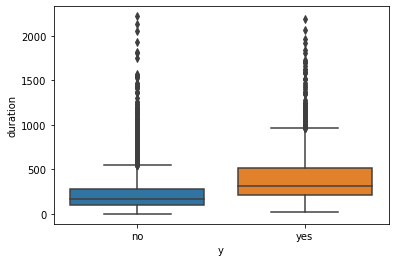

In [20]:
# Now let check for the Duration column
sns.boxplot(df4['y'],df4['duration'])

In [21]:
# now lets remove the outliers
Q1 = df4.duration.quantile(0.25)
Q3 = df4.duration.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-197.0, 651.0)

In [22]:
# here are the outliers
df4[(df4.duration<lower_limit)|(df4.duration>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24461,41,technician,married,secondary,no,112,yes,no,cellular,17,nov,1081,1,131,1,failure,no
24503,33,blue-collar,married,secondary,no,0,yes,no,cellular,17,nov,809,3,181,1,other,no
24528,43,blue-collar,divorced,secondary,no,-259,no,no,cellular,17,nov,732,1,171,2,other,no
24581,59,management,divorced,tertiary,no,3552,yes,no,cellular,17,nov,690,1,123,7,other,no
24590,43,housemaid,married,primary,no,0,no,yes,cellular,17,nov,836,1,129,2,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45031,42,unemployed,married,secondary,no,1289,no,no,cellular,15,oct,1176,3,92,6,success,yes
45072,54,management,divorced,tertiary,no,5475,no,no,cellular,21,oct,1032,1,91,4,success,yes
45073,37,management,married,tertiary,no,203,no,no,cellular,21,oct,759,1,90,5,success,yes
45083,59,entrepreneur,married,secondary,no,496,no,no,cellular,22,oct,738,3,183,1,success,yes


In [23]:
# so we will remove the outliers from the compaign column
df5 = df4[(df4.duration>lower_limit)&(df4.duration<upper_limit)]
df5

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes


In [24]:
df5.duration.unique()

array([ 39, 519, 144,  73, 140, 518, 119,  21, 449,  26, 175, 114,  86,
        81, 200,  79,  58, 303, 324,  80, 161, 297, 146, 120, 381, 123,
        75, 396,  96,  44, 208, 155,  74, 302,  38, 130, 270, 483,  68,
       348, 257,  70, 118, 125,  90, 508,  93, 164, 110,  56, 214, 229,
       573, 138, 147, 190, 103,  89,  42, 186,  77, 102,  71, 504, 166,
       124, 174,  62, 128, 240,  65, 619,  61, 139, 150, 407, 223, 157,
       158, 116, 113,  99, 189, 184,  48, 159,  69, 171, 224, 295, 101,
       422,  78, 609, 148, 204, 227, 193, 151, 178, 117, 599, 340, 333,
       188, 273, 374, 353, 107, 176, 211,  64,  17, 408,  82,  41, 121,
       228,  52,  67, 290, 271,  47, 346, 231, 104, 173,  59,  50, 111,
       165, 276, 134, 319, 300, 149, 253, 129,  54, 106, 296, 411, 266,
       265, 397, 596,  37, 419, 162, 586, 288,  34, 352, 233, 515, 239,
       389, 255, 100, 226,  92,  91, 105, 328, 432, 232, 143, 187,  32,
        53, 201, 192,  83, 216,  51, 588, 131,  84, 127, 163, 17

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='age'>

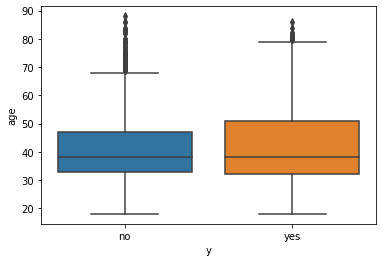

In [25]:
# Now let check for the Age column
sns.boxplot(df5['y'],df5['age'])

In [26]:
# now lets remove the outliers
Q1 = df5.age.quantile(0.25)
Q3 = df5.age.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(9.5, 69.5)

In [27]:
# here are the outliers
df5[(df5.age<lower_limit)|(df5.age>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40368,73,retired,married,tertiary,no,448,no,no,cellular,22,jun,68,1,90,1,success,no
40401,72,self-employed,married,tertiary,no,132,no,no,cellular,1,jul,260,2,65,1,success,yes
40786,83,retired,married,tertiary,no,6236,no,no,cellular,11,aug,155,1,190,2,failure,no
40789,71,management,married,tertiary,no,13297,no,no,cellular,11,aug,265,1,190,2,failure,no
40987,76,retired,married,primary,no,3324,no,no,cellular,13,aug,227,2,192,1,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45134,70,retired,married,secondary,no,0,no,no,cellular,27,oct,258,1,92,5,success,yes
45163,71,retired,married,secondary,no,2064,no,no,cellular,9,nov,379,2,92,3,failure,no
45183,70,retired,married,primary,no,324,no,no,cellular,15,nov,78,1,96,7,success,no
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes


In [28]:
# so we will remove the outliers from the compaign column
df6 = df5[(df5.age>lower_limit)&(df5.age<upper_limit)]
df6

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='age'>

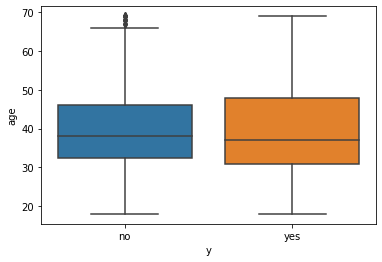

In [29]:
# Now let check for the pdays column
sns.boxplot(df6['y'],df6['age'])

In [30]:
# now lets remove the outliers
Q1 = df6.pdays.quantile(0.25)
Q3 = df6.pdays.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-167.625, 623.375)

In [31]:
# here are the outliers
df6[(df6.pdays<lower_limit)|(df6.pdays>upper_limit)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
43404,54,technician,married,secondary,no,2102,yes,no,cellular,5,apr,547,1,626,2,failure,yes
43507,39,blue-collar,single,secondary,no,1672,yes,no,cellular,20,apr,462,1,648,1,failure,yes
43727,48,technician,divorced,secondary,no,-63,no,yes,unknown,15,may,7,1,670,5,other,no
43848,51,management,married,tertiary,no,176,yes,yes,unknown,1,jun,8,1,687,2,failure,no
43884,59,blue-collar,married,secondary,no,448,no,no,unknown,8,jun,198,1,651,7,other,no
43887,59,management,married,tertiary,no,101,no,yes,unknown,9,jun,29,1,686,2,failure,no
44038,31,management,single,tertiary,no,1539,yes,no,cellular,30,jun,107,2,756,2,other,no
44052,39,blue-collar,married,primary,no,1,yes,no,unknown,1,jul,165,1,745,2,failure,no
44089,37,technician,married,secondary,no,432,yes,no,cellular,6,jul,386,3,776,55,failure,yes
44243,41,blue-collar,married,primary,no,178,yes,no,unknown,20,jul,5,1,791,1,failure,no


In [32]:
# so we will remove the outliers from the compaign column
df7 = df6[(df6.pdays>lower_limit)&(df6.pdays<upper_limit)]
df7.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [33]:
df7.pdays.unique()

array([151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170, 167,
       195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164, 132,
       131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96, 103,
       150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158, 168,
        97, 182, 130, 194, 125, 105, 102,  26, 179,  28, 183, 155, 127,
       112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8, 144,
       191, 177,   5,  99, 133,  93,  92,  10, 156, 106, 184, 153, 146,
       128, 198,   7, 121, 160,  90,  27, 197, 136, 139, 122, 157, 149,
       100, 135, 163,  34,  95, 141, 192,  31,  94, 199, 108, 114,  29,
       268, 247, 253, 244, 239, 245, 204, 231, 238, 258, 230, 265,  71,
       223, 246, 250, 266, 205, 240, 261, 259, 241, 260, 234, 226, 251,
       225, 161, 237, 262, 248, 254, 255, 220, 227, 224, 206, 249, 228,
       263,   2, 270, 207, 252, 200, 269, 232, 233, 256, 273, 272, 242,
       264, 208, 214, 222, 271, 203, 221, 235, 202, 216, 201, 25

<h3>Removing the Irrelevent columns<h3>
<h5>we will remove the day, month, and contact columns because they are irrelevent <h5>

In [34]:
df8 = df7.drop(['day','month','contact'], axis = 1)

               age   balance  duration  campaign     pdays  previous         y
age       1.000000  0.082714  0.014594 -0.000497 -0.074699  0.001432  0.023681
balance   0.082714  1.000000  0.027119  0.003714 -0.113360  0.009822  0.064926
duration  0.014594  0.027119  1.000000  0.014984 -0.010479  0.036861  0.302342
campaign -0.000497  0.003714  0.014984  1.000000  0.048803  0.078283 -0.035334
pdays    -0.074699 -0.113360 -0.010479  0.048803  1.000000 -0.036610 -0.186419
previous  0.001432  0.009822  0.036861  0.078283 -0.036610  1.000000  0.026404
y         0.023681  0.064926  0.302342 -0.035334 -0.186419  0.026404  1.000000


<module 'matplotlib' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

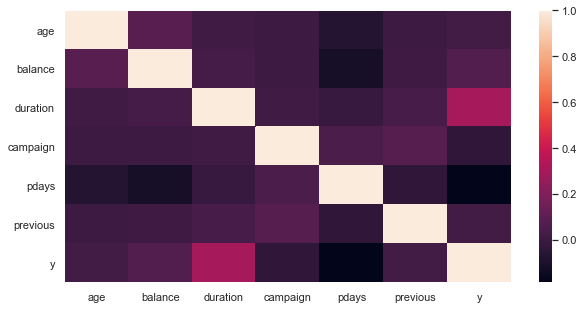

In [35]:
# convert y into 0 and 1
df8['y'] = df8['y'].map({'yes': 1, 'no': 0})
df9 = df8


corr = df9.corr();
print(corr)
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt

 From the above graph, we can see that the corelation of pdays with y is high which is a good thing but the corelation of balance with pdays is high and we will remove one of them

In [36]:
df10 = df9.drop('balance',axis = 1)

<module 'matplotlib' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

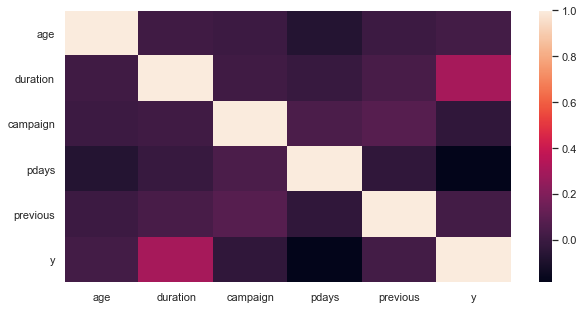

In [37]:
corr = df10.corr();
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt

<h3>Statistical significance of variables (Encoding)<h3>
<h5>we will now convert the categorical data into numberical data then we will see again the corelation<h5>

In [38]:
education = pd.get_dummies(df10['education'])
education.head()

,primary,secondary,tertiary
24060,0,0,1
24062,0,1,0
24064,0,1,0
24072,0,0,1
24077,0,0,1


In [39]:
job = pd.get_dummies(df10['job'])
job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
24060,1,0,0,0,0,0,0,0,0,0,0
24062,1,0,0,0,0,0,0,0,0,0,0
24064,0,0,0,0,0,0,0,1,0,0,0
24072,0,0,0,0,1,0,0,0,0,0,0
24077,0,0,0,0,1,0,0,0,0,0,0


In [40]:
marital = pd.get_dummies(df10['marital'])
marital.head()

,divorced,married,single
24060,0,1,0
24062,0,0,1
24064,0,1,0
24072,0,1,0
24077,0,1,0


In [41]:
poutcome = pd.get_dummies(df10['poutcome'])
poutcome.head()

,failure,other,success
24060,1,0,0
24062,0,1,0
24064,1,0,0
24072,0,1,0
24077,1,0,0


In [42]:
merged = pd.concat([df10,education,job,marital,poutcome], axis = 1)
merged.head()

,age,job,marital,education,default,housing,loan,duration,campaign,pdays,...,services,student,technician,unemployed,divorced,married,single,failure,other,success
24060,33,admin.,married,tertiary,no,no,no,39,1,151,...,0,0,0,0,0,1,0,1,0,0
24062,42,admin.,single,secondary,no,yes,yes,519,1,166,...,0,0,0,0,0,0,1,0,1,0
24064,33,services,married,secondary,no,yes,no,144,1,91,...,1,0,0,0,0,1,0,1,0,0
24072,36,management,married,tertiary,no,yes,no,73,1,86,...,0,0,0,0,0,1,0,0,1,0
24077,36,management,married,tertiary,no,yes,no,140,1,143,...,0,0,0,0,0,1,0,1,0,0


In [43]:
df10 = merged.drop(['marital','poutcome','education','job'], axis = 1)
df10.head()

,age,default,housing,loan,duration,campaign,pdays,previous,y,primary,...,services,student,technician,unemployed,divorced,married,single,failure,other,success
24060,33,no,no,no,39,1,151,3,0,0,...,0,0,0,0,0,1,0,1,0,0
24062,42,no,yes,yes,519,1,166,1,1,0,...,0,0,0,0,0,0,1,0,1,0
24064,33,no,yes,no,144,1,91,4,1,0,...,1,0,0,0,0,1,0,1,0,0
24072,36,no,yes,no,73,1,86,4,0,0,...,0,0,0,0,0,1,0,0,1,0
24077,36,no,yes,no,140,1,143,3,1,0,...,0,0,0,0,0,1,0,1,0,0


In [44]:
#The default column have yes/no, we will convert it into (0 = no) and (1 = yes)

df10['default'] = df10['default'].map({'yes': 1, 'no': 0})
df10.head()

,age,default,housing,loan,duration,campaign,pdays,previous,y,primary,...,services,student,technician,unemployed,divorced,married,single,failure,other,success
24060,33,0,no,no,39,1,151,3,0,0,...,0,0,0,0,0,1,0,1,0,0
24062,42,0,yes,yes,519,1,166,1,1,0,...,0,0,0,0,0,0,1,0,1,0
24064,33,0,yes,no,144,1,91,4,1,0,...,1,0,0,0,0,1,0,1,0,0
24072,36,0,yes,no,73,1,86,4,0,0,...,0,0,0,0,0,1,0,0,1,0
24077,36,0,yes,no,140,1,143,3,1,0,...,0,0,0,0,0,1,0,1,0,0


In [45]:
# convert housing into 0 and 1
df10['housing'] = df10['housing'].map({'yes': 1, 'no': 0})
df10.head()

,age,default,housing,loan,duration,campaign,pdays,previous,y,primary,...,services,student,technician,unemployed,divorced,married,single,failure,other,success
24060,33,0,0,no,39,1,151,3,0,0,...,0,0,0,0,0,1,0,1,0,0
24062,42,0,1,yes,519,1,166,1,1,0,...,0,0,0,0,0,0,1,0,1,0
24064,33,0,1,no,144,1,91,4,1,0,...,1,0,0,0,0,1,0,1,0,0
24072,36,0,1,no,73,1,86,4,0,0,...,0,0,0,0,0,1,0,0,1,0
24077,36,0,1,no,140,1,143,3,1,0,...,0,0,0,0,0,1,0,1,0,0


In [46]:
# convert loan into 0 and 1
df10['loan'] = df10['loan'].map({'yes': 1, 'no': 0})
df10.head()

,age,default,housing,loan,duration,campaign,pdays,previous,y,primary,...,services,student,technician,unemployed,divorced,married,single,failure,other,success
24060,33,0,0,0,39,1,151,3,0,0,...,0,0,0,0,0,1,0,1,0,0
24062,42,0,1,1,519,1,166,1,1,0,...,0,0,0,0,0,0,1,0,1,0
24064,33,0,1,0,144,1,91,4,1,0,...,1,0,0,0,0,1,0,1,0,0
24072,36,0,1,0,73,1,86,4,0,0,...,0,0,0,0,0,1,0,0,1,0
24077,36,0,1,0,140,1,143,3,1,0,...,0,0,0,0,0,1,0,1,0,0


In [47]:
df10.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,y,primary,...,services,student,technician,unemployed,divorced,married,single,failure,other,success
count,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,...,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000,6262.000000
mean,39.810763,0.006867,0.635420,0.144842,221.099489,1.560683,221.164804,2.977164,0.209358,0.116097,...,0.086873,0.030022,0.168157,0.026988,0.109390,0.569307,0.321303,0.614181,0.205845,0.179974
std,9.913882,0.082588,0.481351,0.351969,138.963187,0.700519,108.761824,4.622703,0.406883,0.320367,...,0.281672,0.170662,0.374036,0.162062,0.312153,0.495213,0.467014,0.486827,0.404350,0.384197
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,115.000000,1.000000,128.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,1.000000,0.000000,187.000000,1.000000,195.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,47.000000,0.000000,1.000000,0.000000,296.000000,2.000000,325.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,69.000000,1.000000,1.000000,1.000000,649.000000,3.000000,616.000000,275.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h3>Pearson Correlation, multi Linearity, Relationship between variables<h3>

<module 'matplotlib' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>

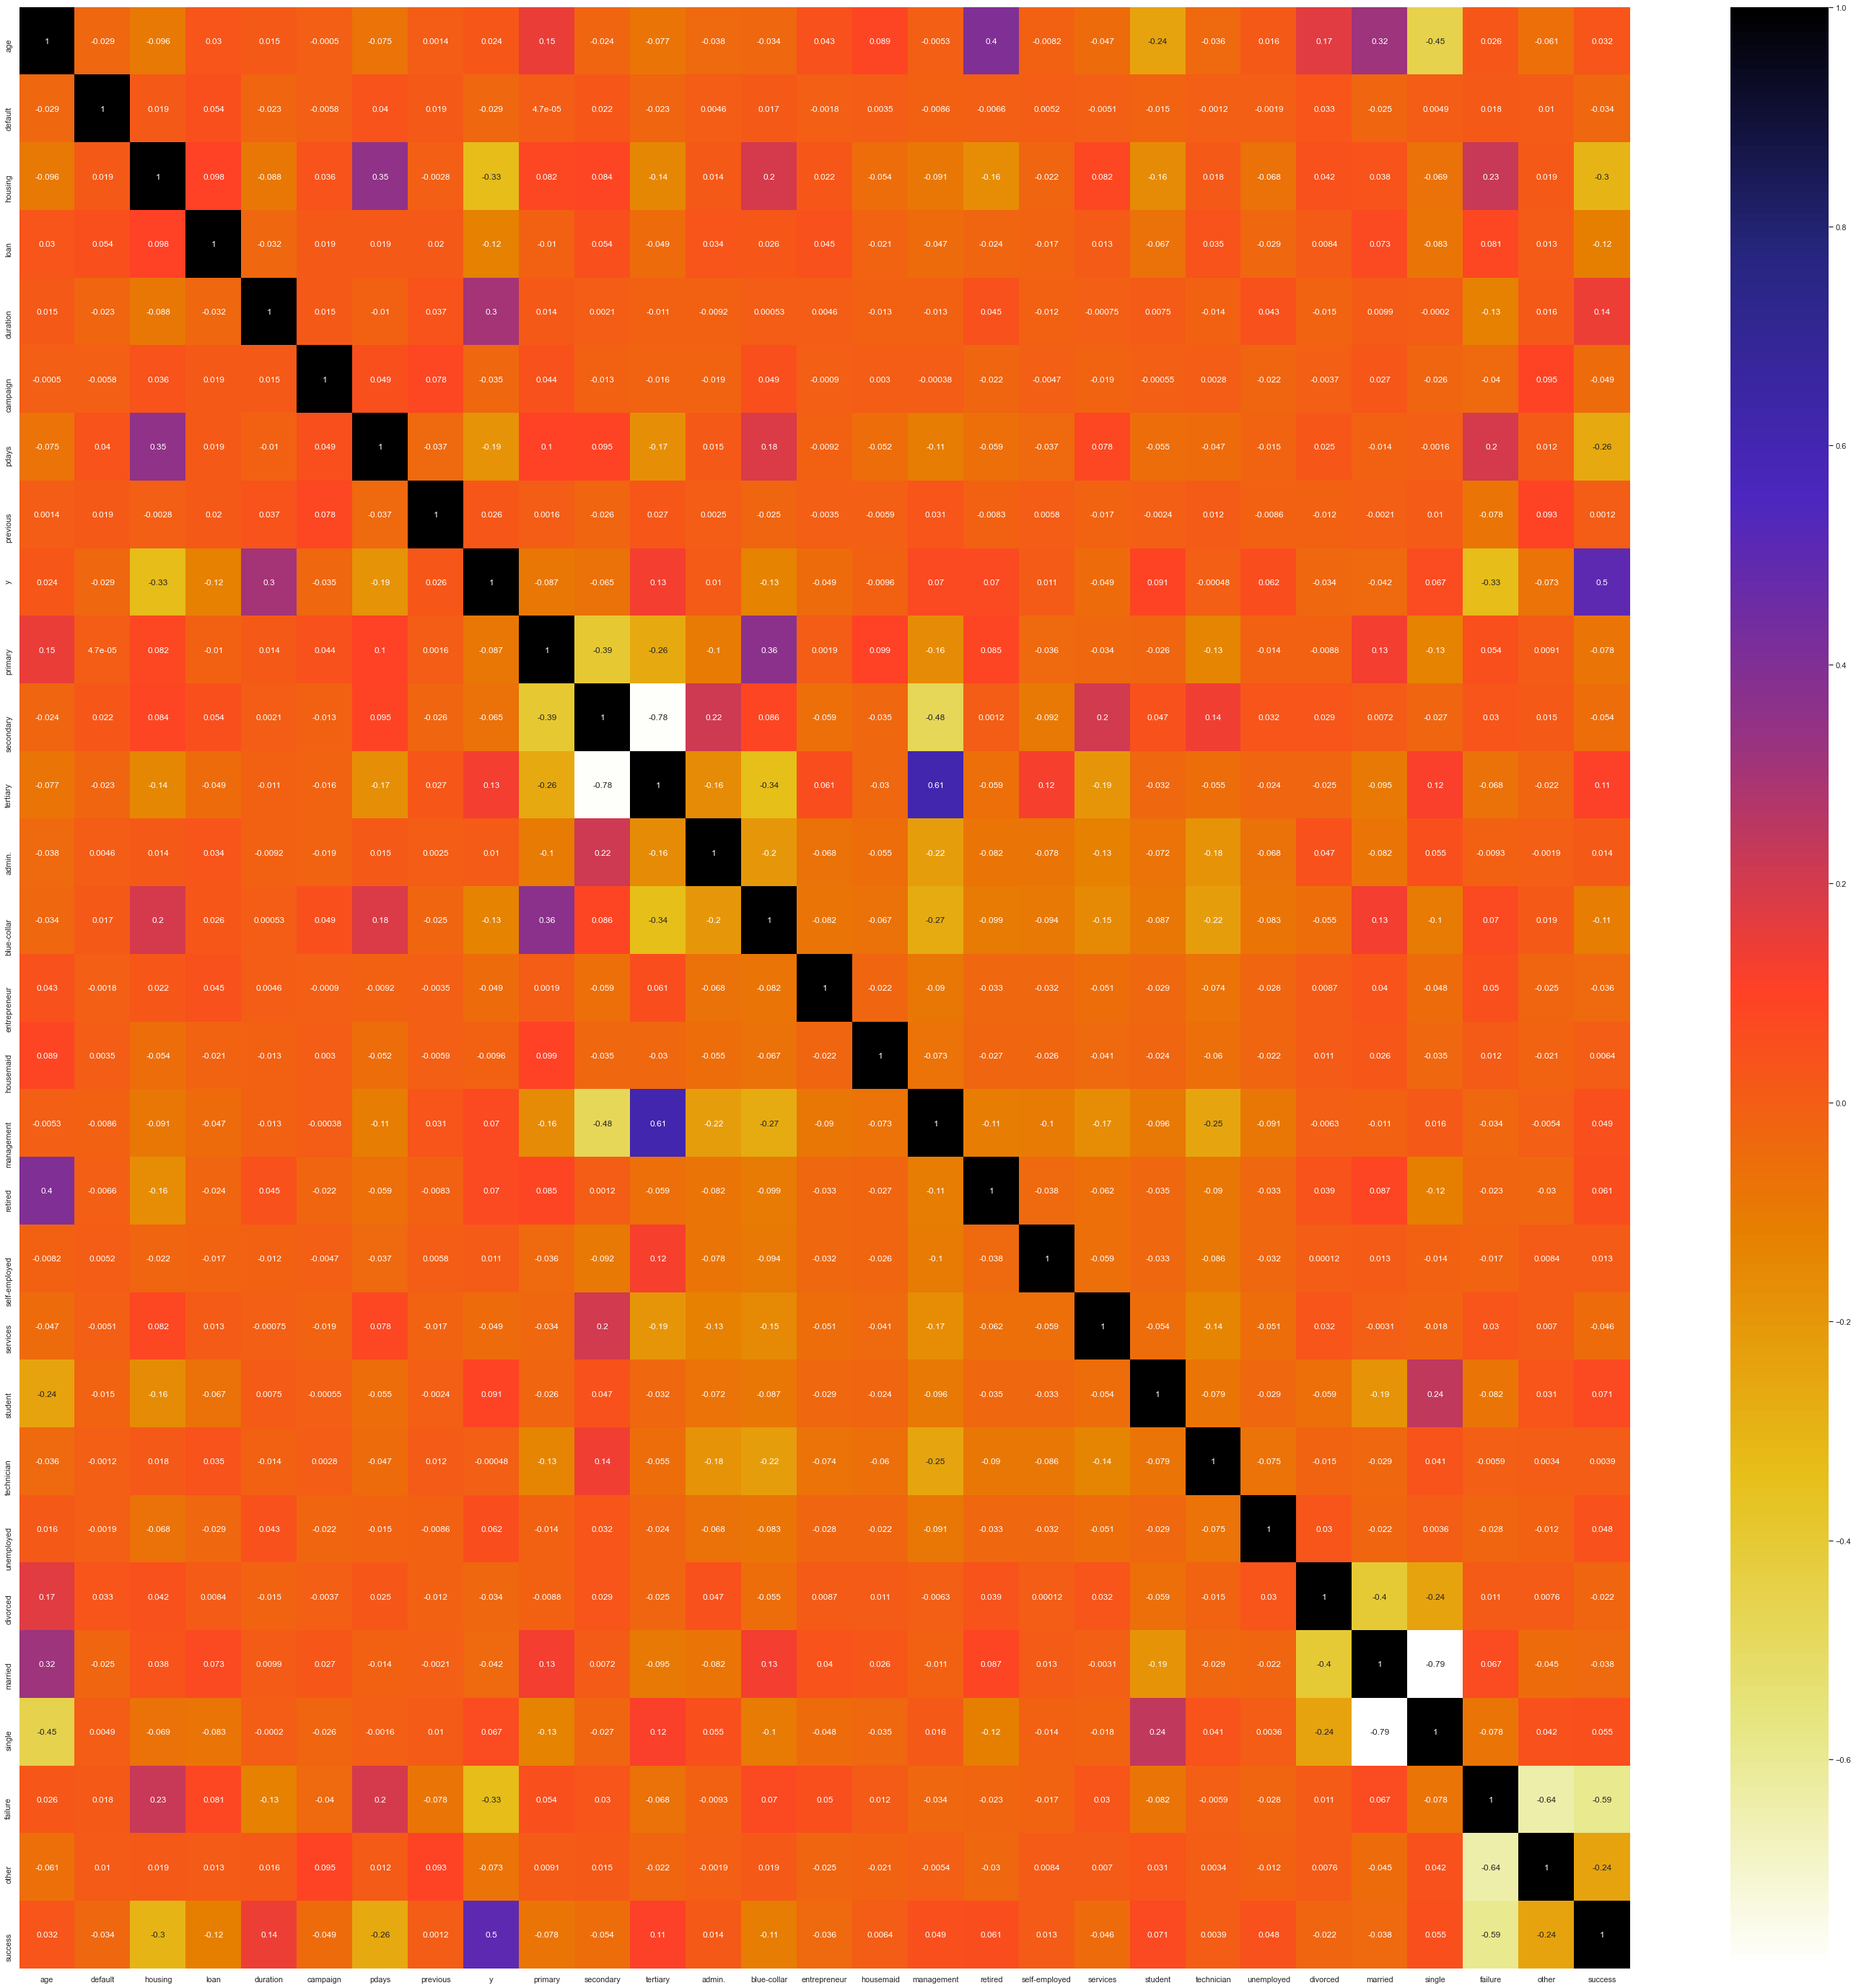

In [48]:
import seaborn as sns
#Using Pearson Correlation
#plt.figure(figsize=(12,10))
sns.set(rc = {'figure.figsize':(50,50)})
cor = df10.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt

In [49]:
def correlation(df10, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df10.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [50]:
corr_features = correlation(df10, 0.7)
len(set(corr_features))

2

with the following function we can select highly correlated features
it will remove the first feature that is correlated with anything other feature

In [51]:
corr_features

{'single', 'tertiary'}

now the model told us itselt to remove single and tertiary

In [52]:
df10.drop(corr_features,axis=1)

,age,default,housing,loan,duration,campaign,pdays,previous,y,primary,...,self-employed,services,student,technician,unemployed,divorced,married,failure,other,success
24060,33,0,0,0,39,1,151,3,0,0,...,0,0,0,0,0,0,1,1,0,0
24062,42,0,1,1,519,1,166,1,1,0,...,0,0,0,0,0,0,0,0,1,0
24064,33,0,1,0,144,1,91,4,1,0,...,0,1,0,0,0,0,1,1,0,0
24072,36,0,1,0,73,1,86,4,0,0,...,0,0,0,0,0,0,1,0,1,0
24077,36,0,1,0,140,1,143,3,1,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45193,28,0,0,0,449,2,33,4,1,0,...,1,0,0,0,0,0,0,0,0,1
45194,59,0,1,1,162,2,187,5,0,0,...,0,0,0,0,0,0,1,1,0,0
45195,68,0,0,0,212,1,187,6,1,0,...,0,0,0,0,0,0,1,0,0,1
45201,53,0,0,0,226,1,184,4,1,0,...,0,0,0,0,0,0,1,0,0,1


#  Relationship between variables
#### Y with all the other variables

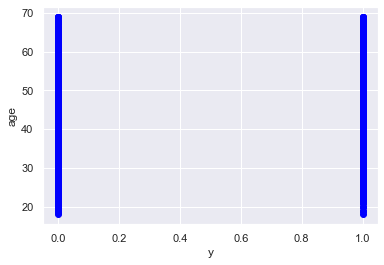

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('y')
plt.ylabel('age')
plt.scatter(df10.y,df10.age,color = 'blue')

<BarContainer object of 6262 artists>

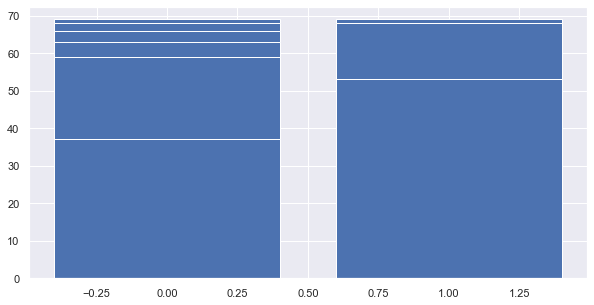

In [69]:
plt.bar(df10.y,df10.age)

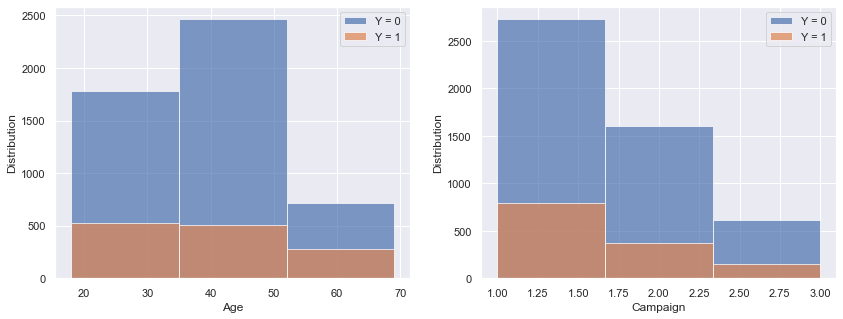

In [80]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df10['age'][df10['y'] == 0], bins=3, alpha = 0.7, label = 'Y = 0')
plt.hist(df10['age'][df10['y'] == 1], bins=3, alpha = 0.7, label = 'Y = 1')
plt.ylabel('Distribution')
plt.xlabel('Age')
plt.legend()

plt.subplot(1,2,2)
plt.hist(df10['campaign'][df10['y'] == 0], bins=3, alpha = 0.7, label = 'Y = 0')
plt.hist(df10['campaign'][df10['y'] == 1], bins=3, alpha = 0.7, label = 'Y = 1')
plt.ylabel('Distribution')
plt.xlabel('Campaign')
plt.legend()

# plt.subplot(1,2,2)
# plt.hist(df10['duration'][df10['y'] == 0], bins=3, alpha = 0.7, label = 'Y = 0')
# plt.hist(df10['duration'][df10['y'] == 1], bins=3, alpha = 0.7, label = 'Y = 1')
# plt.ylabel('Distribution')
# plt.xlabel('Duration')
# plt.legend()

plt.show()

# Lets check the Distribution of variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

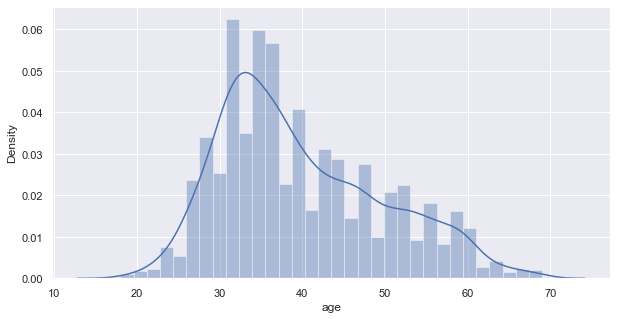

In [54]:

sns.set(rc = {'figure.figsize':(10,5)})
sns.distplot(df10['age'])
plt

As you can see from the above graph that the probability density function line is at the peak between 30 to 40
Which means that the age column have huge age number ranged from 30 to 40, then it is slowly decreasing till 70


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

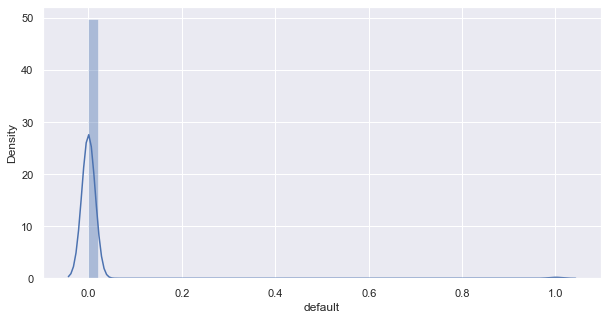

In [55]:


sns.set(rc = {'figure.figsize':(10,5)})
sns.distplot(df10['default'])
plt

In the above graph, The density line is at peaked on 0, which means that the default column have 0 more and more then 1
The density of 0 is 25 against the 1 which is almost 0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

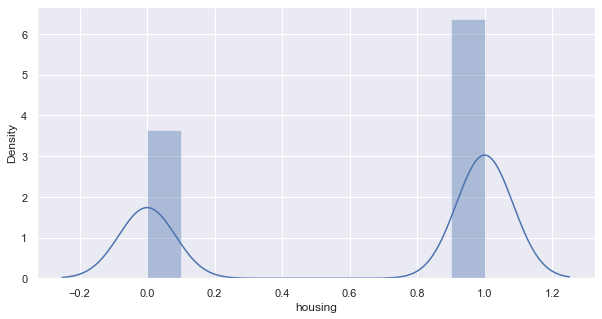

In [56]:


sns.set(rc = {'figure.figsize':(10,5)})
sns.distplot(df10['housing'])
plt

in the above graph, The density line is interesting here, it is going up on 0 and then again gone up on 1
But here the number of 1 is slightly greater then the 0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

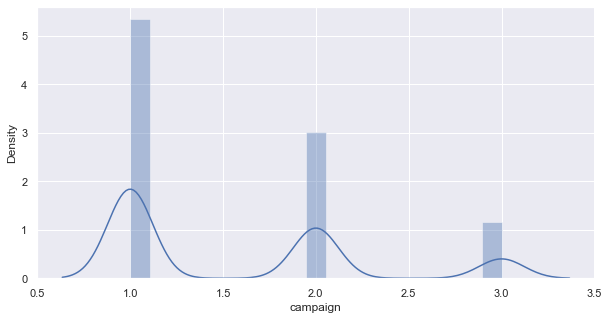

In [57]:


sns.set(rc = {'figure.figsize':(10,5)})
sns.distplot(df10['campaign'])
plt

The above graph shows The campaign column have three values that are 1,2,3
The density of 1 is higher then 2, and 2 is greater then 3

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

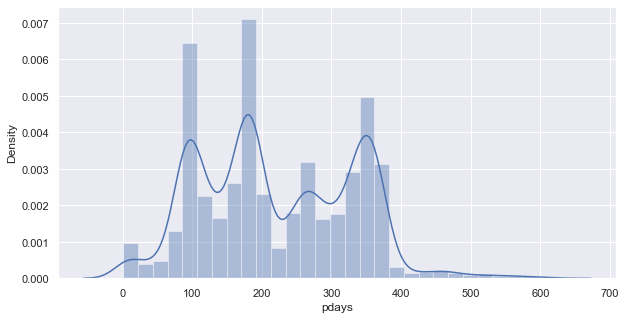

In [58]:


sns.set(rc = {'figure.figsize':(10,5)})
sns.distplot(df10['pdays'])
plt

In the above graph, The density increases from 0 and peaked at 100, then between 100 and 200, the density is low, at 200 it is again at the peak
The density is higher at 100

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

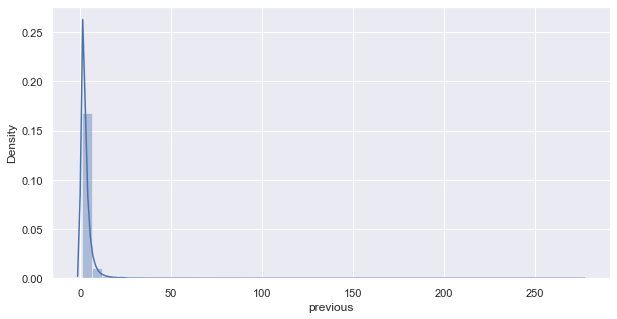

In [59]:

sns.set(rc = {'figure.figsize':(10,5)})
sns.distplot(df10['previous'])
plt

the density in the above graph is between 0 to 5 is higher, which means that the values are huge in munber from 0 to 5

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

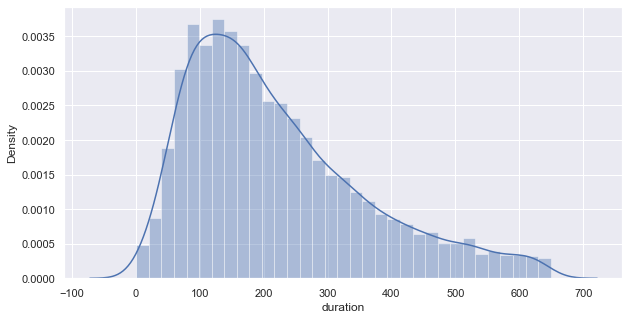

In [60]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.distplot(df10['duration'])
plt

in the above graph, The density is at peak on 200 almost
From 200 to 400, the density is constantly decreasing
most of the values ranges from 0 to 200

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

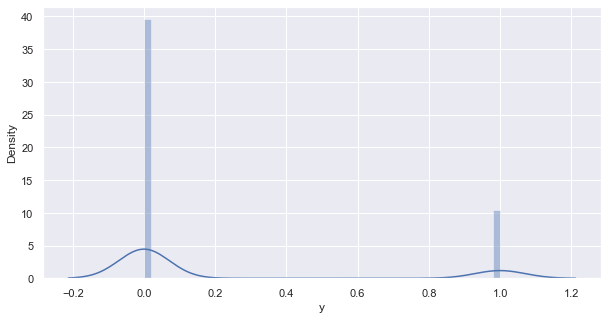

In [61]:

# let draw dist plot  of y_train
sns.set(rc = {'figure.figsize':(10,5)})
sns.distplot(df10['y'])
plt

The graph is almost equally distributed, the 0 and 1 values are almost equal in number


<h1>Class imbalance and its treatment (Oversampled & Undersampled)<h1>

In [62]:
Final = df10.copy()
print(sorted(Counter(Final['y']).items()))

[(0, 4951), (1, 1311)]


In [63]:
X = Final.drop('y',axis=1)   #Feature Matrix
y = Final.y

<AxesSubplot:>

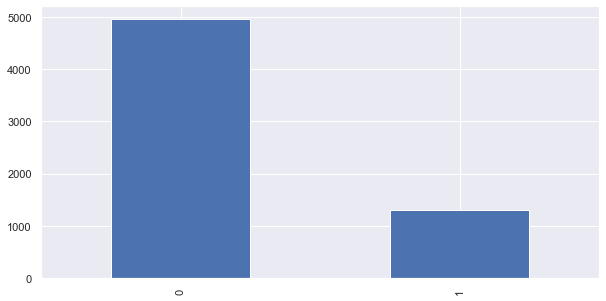

In [64]:
# Following is the ratio of yes and no in the Y column before the sampling
y.value_counts().plot(kind='bar')

<h3>Over Sampling<h3>

In [65]:
# over sampling of the y
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
x_over_resampled, y_over_resampled = ros.fit_resample(X,y)
print(sorted(Counter(y_over_resampled).items()),y_over_resampled.shape)

[(0, 4951), (1, 4951)] (9902,)


<AxesSubplot:>

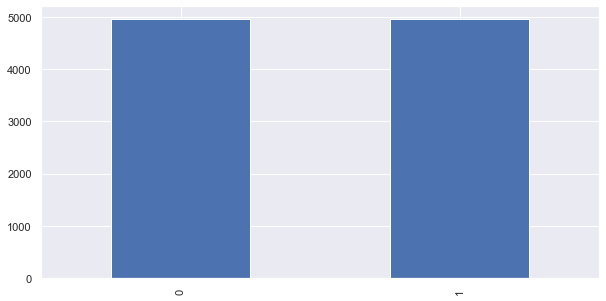

In [66]:
# Following is the ratio of yes and no in the Y column after the over sampling
y_over_resampled.value_counts().plot(kind='bar')

<h3>Under Sampling<h3>

In [67]:
# under sampling of the y
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
x_under_resampled, y_under_resampled = rus.fit_resample(X,y)
print(sorted(Counter(y_under_resampled).items()),y_under_resampled.shape)

[(0, 1311), (1, 1311)] (2622,)


<AxesSubplot:>

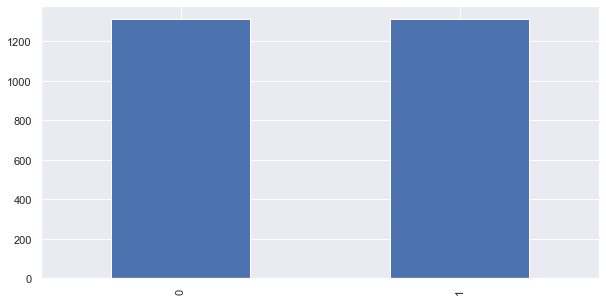

In [68]:
# Following is the ratio of yes and no in the Y column under sampling
y_under_resampled.value_counts().plot(kind='bar')